In [1]:
import PublicDataReader as pdr
print(pdr.__version__)


>>> PublicDataReader Version : 2021.4.12

- Author : Wooil Jeong
- E-mail : wooil@kakao.com
- Github : https://github.com/WooilJeong/PublicDataReader
- Blog : https://wooiljeong.github.io



#### API 서비스 인증키 발급

In [2]:
# 공공 데이터 포털에서 발급 받은 서비스 인증키
serviceKey="0%2BxMMXkLj8nvKHhUgIzWPMdkHMGntGESg9ZCue80PT9KQl8KYHTo%2BT%2BPTrdmPLMowym5JNp5JRyY90zVGyvE2w%3D%3D"
#serviceKey="GfJ3Kcut%2BKDFsIvLEgT4sTK6O29tZsBVArZUI0zzPKCxPlxHrSd4zz4yxSpOOt4F0Nfiw%2BXvYf2OF3uafwKtMw%3D%3D"

# 국토교통부 실거래가 Open API 인스턴스 생성
molit = pdr.Transaction(serviceKey)

>>> 아파트매매 실거래자료 조회 서비스가 정상 작동합니다.
>>> 아파트매매 실거래 상세 자료 조회 서비스가 정상 작동합니다.
>>> 아파트 전월세 자료 조회 서비스가 정상 작동합니다.
>>> 아파트 분양권전매 신고 자료 조회 서비스가 정상 작동합니다.
>>> 오피스텔 매매 신고 조회 서비스가 정상 작동합니다.
>>> 오피스텔 전월세 신고 조회 서비스가 정상 작동합니다.
>>> 연립다세대 매매 실거래자료 조회 서비스가 정상 작동합니다.
>>> 연립다세대 전월세 실거래자료 조회 서비스가 정상 작동합니다.
>>> 단독/다가구 매매 실거래 조회 서비스가 정상 작동합니다.
>>> 단독/다가구 전월세 자료 조회 서비스가 정상 작동합니다.
>>> 토지 매매 신고 조회 서비스가 정상 작동합니다.
>>> 상업업무용 부동산 매매 신고 자료 조회 서비스가 정상 작동합니다.


#### 필요한 데이터 조회 및 분석

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#### 지역코드 검색

In [4]:
codeResult = molit.CodeFinder("강남구")
codeResult.head()

,법정동명,법정구코드
0,서울특별시 강남구,11680
1,서울특별시 강남구 역삼동,11680
2,서울특별시 강남구 개포동,11680
3,서울특별시 강남구 청담동,11680
4,서울특별시 강남구 삼성동,11680


#### 각 자치구별 코드 조회 후 csv 파일 생성

In [5]:
AreaCode = pd.read_csv('AreaCode.csv')
AreaCode

,법정동명,법정구코드
0,서울특별시,11000
1,강남구,11680
2,강동구,11740
3,강북구,11305
4,강서구,11500
...,...,...
64,화성시,41590
65,여주시,41670
66,가평군,41820
67,양평군,41830


#### 실거래자료 조회

In [6]:
# df_AptTrade = molit.AptTrade(11680, 202107)             # 아파트매매 실거래자료 조회
# df_AptTradeDetail = molit.AptTradeDetail(11680, 202107) # 아파트매매 실거래 상세 자료 조회
# df_AptRent = molit.AptRent(11680, 202107)               # 아파트 전월세 자료 조회
# df_AptOwnership = molit.AptOwnership(11680, 202107)     # 아파트 분양권전매 신고 자료 조회

# df_OffiTrade = molit.OffiTrade(11680, 202107)           # 오피스텔 매매 신고 조회
# df_OffiRent = molit.OffiRent(11680, 202107)             # 오피스텔 전월세 신고 조회
# df_RHTrade = molit.RHTrade(11680, 202107)               # 연립다세대 매매 실거래자료 조회
# df_RHRent = molit.RHRent(11680, 202107)                 # 연립다세대 전월세 실거래자료 조회

# df_DHTrade = molit.DHTrade(11680, 202107)               # 단독/다가구 매매 실거래 조회
# df_DHRent = molit.DHRent(11680, 202107)                 # 단독/다가구 전월세 자료 조회
# df_LandTrade = molit.LandTrade(11680, 202107)           # 토지 매매 신고 조회
# df_BizTrade = molit.BizTrade(11680, 202107)             # 상업업무용 부동산 매매 신고 자료 조회

In [7]:
# 아파트매매 실거래자료 조회
df_AptTrade = molit.AptTrade(11680, 202107)
df_AptTrade.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,11680,개포동,2021-07-05,성원대치2단지아파트,12,39.53,15,1992,137000
1,11680,개포동,2021-07-05,삼익대청아파트,12,51.12,4,1992,155000
2,11680,개포동,2021-07-07,성원대치2단지아파트,12,49.86,3,1992,159500
3,11680,개포동,2021-07-07,삼익대청아파트,12,51.12,12,1992,151000
4,11680,개포동,2021-07-07,성원대치2단지아파트,12,33.18,15,1992,110000


In [8]:
# 아파트매매 실거래 상세 자료 조회
df_AptTradeDetail = molit.AptTradeDetail(11680, 202107)
df_AptTradeDetail.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,11680,개포동,2021-07-05,삼익대청아파트,12,51.12,4,1992,155000,12,...,11680,10300,1,개포로109길,21,0,11680,1,0.0,4166040
1,11680,개포동,2021-07-05,성원대치2단지아파트,12,39.53,15,1992,137000,12,...,11680,10300,1,개포로109길,9,0,11680,1,0.0,4166040
2,11680,개포동,2021-07-07,삼익대청아파트,12,51.12,12,1992,151000,12,...,11680,10300,1,개포로109길,21,0,11680,1,0.0,4166040
3,11680,개포동,2021-07-07,성원대치2단지아파트,12,49.86,3,1992,159500,12,...,11680,10300,1,개포로109길,9,0,11680,1,0.0,4166040
4,11680,개포동,2021-07-07,성원대치2단지아파트,12,33.18,15,1992,110000,12,...,11680,10300,1,개포로109길,9,0,11680,1,0.0,4166040


In [9]:
# 아파트 전월세 자료 조회
df_AptRent = molit.AptRent(11680, 202107)
df_AptRent.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,보증금액,월세금액
0,11680,개포동,2021-07-01,개포주공 7단지,185,83.700,11,1983,70000,0
1,11680,개포동,2021-07-01,래미안블레스티지,1280,99.967,12,2019,115500,0
2,11680,개포동,2021-07-02,성원대치2단지아파트,12,33.180,15,1992,24150,0
3,11680,개포동,2021-07-03,개포주공 7단지,185,60.760,3,1983,64000,0
4,11680,개포동,2021-07-03,개포주공 5단지,187,83.170,3,1983,40000,46


In [10]:
# 아파트 분양권전매 신고 자료 조회
df_AptOwnership = molit.AptOwnership(11680, 202107)
df_AptOwnership.head()

,지역코드,법정동,거래일,시군구,단지,지번,구분,전용면적,층,거래금액
0,11680,개포동,2021-07-10,강남구,디에이치 퍼스티어 아이파크,660-1,입,59.9742,15,199237
1,11680,개포동,2021-07-17,강남구,디에이치 퍼스티어 아이파크,660-1,입,59.9742,17,207220


In [11]:
# 오피스텔 매매 신고 조회
df_OffiTrade = molit.OffiTrade(11680, 202107)
df_OffiTrade.head()

,지역코드,법정동,거래일,시군구,단지,지번,전용면적,층,거래금액
0,11680,개포동,2021-07-10,강남구,하우징허브럭스,1229-10,59.77,2,60000
1,11680,논현동,2021-07-01,강남구,강남구청역 에스케이 허브 블루,241-3,38.75,9,38000
2,11680,논현동,2021-07-06,강남구,강남구청역 에스케이 허브 블루,241-3,52.24,8,56000
3,11680,논현동,2021-07-07,강남구,이안 논현,277-36,87.89,9,130000
4,11680,논현동,2021-07-24,강남구,운현오피스텔,205-8,30.03,14,19000


In [12]:
# 오피스텔 전월세 신고 조회
df_OffiRent = molit.OffiRent(11680, 202107)
df_OffiRent.head()

,지역코드,법정동,거래일,시군구,단지,지번,전용면적,층,보증금,월세
0,11680,개포동,2021-07-08,강남구,대청타워,13-3,32.44,6,18000,0
1,11680,개포동,2021-07-10,강남구,대청타워,13-3,37.55,21,5000,55
2,11680,개포동,2021-07-12,강남구,(1237-3),1237-3,29.95,5,3000,80
3,11680,논현동,2021-07-03,강남구,\t(242-27)\t,242-27,43.92,8,40000,0
4,11680,대치동,2021-07-01,강남구,대치 클래시아,622-1,20.80,7,1000,125


In [13]:
# 연립다세대 매매 실거래자료 조회
df_RHTrade = molit.RHTrade(11680, 202107)
df_RHTrade.head()

,지역코드,법정동,거래일,연립다세대,지번,전용면적,건축년도,층,거래금액
0,11680,개포동,2021-07-01,G-heim,1245-5,25.89,2017,5,39000
1,11680,개포동,2021-07-02,G-heim,1245-5,25.89,2017,6,39000
2,11680,개포동,2021-07-02,갤러리빌라,1166-7,59.61,2015,3,55000
3,11680,개포동,2021-07-02,개포 비버리하임,1193-5,27.72,2018,4,39500
4,11680,개포동,2021-07-02,아비채 2,1245-10,28.74,2016,3,38000


In [14]:
# 연립다세대 전월세 실거래자료 조회
df_RHRent = molit.RHRent(11680, 202107)
df_RHRent.head()

,지역코드,법정동,거래일,연립다세대,지번,전용면적,건축년도,층,보증금액,월세금액
0,11680,개포동,2021-07-01,(660-13),660-13,45.13,2012,3,10000,65
1,11680,개포동,2021-07-02,(160-6),160-6,37.95,2012,3,22000,0
2,11680,개포동,2021-07-02,동산빌라,1164-29,42.84,1996,3,30000,0
3,11680,개포동,2021-07-02,현대빌라(15세대),1185-6,81.54,1990,3,40000,65
4,11680,개포동,2021-07-05,드림하우스,1231-21,18.60,2014,2,1000,60


In [15]:
# 단독/다가구 매매 실거래 조회
df_DHTrade = molit.DHTrade(11680, 202107)
df_DHTrade.head()

,지역코드,법정동,거래일,주택유형,대지면적,연면적,건축년도,거래금액
0,11680,개포동,2021-07-12,단독,168.9,246.78,1990,258000
1,11680,개포동,2021-07-12,단독,169.0,248.10,1988,258160
2,11680,논현동,2021-07-02,다가구,168.4,357.50,1996,297500
3,11680,논현동,2021-07-04,다가구,182.6,409.68,1997,420000
4,11680,논현동,2021-07-06,단독,340.5,1048.49,1989,1550000


In [16]:
# 단독/다가구 전월세 자료 조회
df_DHRent = molit.DHRent(11680, 202107)
df_DHRent.head()

,지역코드,법정동,거래일,계약면적,보증금액,월세금액
0,11680,개포동,2021-07-03,20.00,10000,0
1,11680,개포동,2021-07-03,61.00,25000,0
2,11680,개포동,2021-07-03,62.12,15000,20
3,11680,개포동,2021-07-03,62.12,15000,20
4,11680,개포동,2021-07-05,38.16,15000,0


In [17]:
# 토지 매매 신고 조회
df_LandTrade = molit.LandTrade(11680, 202107)
df_LandTrade.head()

,지역코드,법정동,거래일,시군구,용도지역,지목,지분거래구분,거래면적,거래금액
0,11680,논현동,2021-07-23,강남구,제3종일반주거지역,대,NaN,34.0,100000
1,11680,논현동,2021-07-23,강남구,제3종일반주거지역,대,NaN,34.0,100000
2,11680,대치동,2021-07-16,강남구,제1종전용주거지역,도로,NaN,114.0,10000
3,11680,도곡동,2021-07-08,강남구,제3종일반주거지역,답,NaN,191.0,491107
4,11680,도곡동,2021-07-17,강남구,제2종일반주거지역,도로,NaN,13.0,3200


In [18]:
# 상업업무용 부동산 매매 신고 자료 조회
df_BizTrade = molit.BizTrade(11680, 202107)
df_BizTrade.head()

,지역코드,법정동,거래일,시군구,용도지역,유형,대지면적,구분,건물면적,건물주용도,건축년도,층,거래금액
0,11680,개포동,2021-07-03,강남구,제2종일반주거,일반,273.0,NaN,791.66,제1종근린생활,1991,NaN,580000
1,11680,개포동,2021-07-09,강남구,제3종일반주거,집합,NaN,NaN,7.40,제2종근린생활,1991,NaN,10000
2,11680,개포동,2021-07-10,강남구,제3종일반주거,집합,NaN,NaN,13.25,제2종근린생활,1984,NaN,44000
3,11680,개포동,2021-07-11,강남구,제3종일반주거,집합,NaN,NaN,65.20,제1종근린생활,1984,NaN,140000
4,11680,개포동,2021-07-12,강남구,제3종일반주거,집합,NaN,NaN,26.18,판매,2011,NaN,24000


#### 지역, 기간 별 데이터 프레임 만들기

In [19]:
## Function(API서비스 메서드, 지역코드(5자리), 시작월(YYYYMM), 종료월(YYYYMM))

# df_AptTradeSum = molit.DataCollector(molit.AptTrade, 11680, 202101, 202107)
# df_AptTradeDetailSum = molit.DataCollector(molit.AptTradeDetail, 11680, 202101, 202107)
# df_AptRentSum = molit.DataCollector(molit.AptRent, 11680, 202101, 202107)
# df_AptOwnershipSum = molit.DataCollector(molit.AptOwnership, 11680, 202101, 202107)

# df_OffiTradeSum = molit.DataCollector(molit.OffiTrade, 11680, 202101, 202107)
# df_OffiRentSum = molit.DataCollector(molit.OffiRent, 11680, 202101, 202107)
# df_RHTradeSum = molit.DataCollector(molit.RHTrade, 11680, 202101, 202107)
# df_RHRentSum = molit.DataCollector(molit.RHRent, 11680, 202101, 202107)

# df_DHTradeSum = molit.DataCollector(molit.DHTrade, 11680, 202101, 202107)
# df_DHRentSum = molit.DataCollector(molit.DHRent, 11680, 202101, 202107)
# df_LandTradeSum = molit.DataCollector(molit.LandTrade, 11680, 202101, 202107)
# df_BizTradeSum = molit.DataCollector(molit.BizTrade, 11680, 202101, 202107)

In [20]:
df_AptTradeSum = molit.DataCollector(molit.AptTrade, 11680, 202101, 202107)
df_AptTradeSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,11680,개포동,2021-01-01,개포주공 6단지,185,53.06,3,1983,178000
1,11680,개포동,2021-01-01,현대1차101동~106동,653,95.40,9,1984,215000
2,11680,개포동,2021-01-03,우성8,179,78.93,3,1987,181000
3,11680,개포동,2021-01-04,성원대치2단지아파트,12,49.86,12,1992,150000
4,11680,개포동,2021-01-04,삼익대청아파트,12,60.00,13,1992,157000


In [21]:
df_AptTradeDetailSum = molit.DataCollector(molit.AptTradeDetail, 11680, 202101, 202107)
df_AptTradeDetailSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,11680,개포동,2021-01-01,개포주공 6단지,185,53.06,3,1983,178000,185,...,11680,10300,1,개포로,516,0,11680,1,0.0,3122001
1,11680,개포동,2021-01-01,현대1차101동~106동,653,95.40,9,1984,215000,653,...,11680,10300,1,개포로,303,0,11680,1,0.0,3122001
2,11680,개포동,2021-01-03,우성8,179,78.93,3,1987,181000,179,...,11680,10300,1,개포로,411,0,11680,1,0.0,3122001
3,11680,개포동,2021-01-04,삼익대청아파트,12,60.00,13,1992,157000,12,...,11680,10300,1,개포로109길,21,0,11680,1,0.0,4166040
4,11680,개포동,2021-01-04,성원대치2단지아파트,12,49.86,12,1992,150000,12,...,11680,10300,1,개포로109길,9,0,11680,1,0.0,4166040


In [22]:
df_AptRentSum = molit.DataCollector(molit.AptRent, 11680, 202101, 202107)
df_AptRentSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,보증금액,월세금액
0,11680,개포동,2021-01-01,개포래미안포레스트,1282,49.92,5,2020,50000,130
1,11680,개포동,2021-01-01,개포래미안포레스트,1282,59.92,3,2020,20444,66
2,11680,개포동,2021-01-02,성원대치2단지아파트,12,49.86,4,1992,37800,0
3,11680,개포동,2021-01-02,성원대치2단지아파트,12,33.18,15,1992,33000,0
4,11680,개포동,2021-01-03,개포주공 7단지,185,83.70,12,1983,85000,0


In [23]:
df_AptOwnershipSum = molit.DataCollector(molit.AptOwnership, 11680, 202101, 202107)
df_AptOwnershipSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,시군구,단지,지번,구분,전용면적,층,거래금액
0,11680,개포동,2021-01-04,강남구,디에이치 퍼스티어 아이파크,660-1,입,59.9742,18,194005
1,11680,개포동,2021-01-07,강남구,개포래미안포레스트,1282,입,49.9200,7,180000
2,11680,개포동,2021-01-09,강남구,디에이치 퍼스티어 아이파크,660-1,입,84.9956,11,255903
3,11680,개포동,2021-01-18,강남구,개포래미안포레스트,1282,입,74.6600,12,240000
4,11680,개포동,2021-01-20,강남구,개포프레지던스자이,189,입,84.5978,26,282000


In [24]:
df_OffiTradeSum = molit.DataCollector(molit.OffiTrade, 11680, 202101, 202107)
df_OffiTradeSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,시군구,단지,지번,전용면적,층,거래금액
0,11680,개포동,2021-01-06,강남구,메트하임,186-13,22.00,15,34800
1,11680,개포동,2021-01-13,강남구,대청타워,13-3,31.91,14,23500
2,11680,개포동,2021-01-14,강남구,대청타워,13-3,31.91,15,21500
3,11680,논현동,2021-01-02,강남구,강남파라곤,241-1,75.94,10,119000
4,11680,논현동,2021-01-06,강남구,\t(96)\t,96,22.05,6,15500


In [25]:
df_OffiRentSum = molit.DataCollector(molit.OffiRent, 11680, 202101, 202107)
df_OffiRentSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,시군구,단지,지번,전용면적,층,보증금,월세
0,11680,개포동,2021-01-19,강남구,메트하임,186-13,22.00,14,1000,90
1,11680,개포동,2021-01-21,강남구,CCRU오피스텔,1229-6,50.04,3,33600,0
2,11680,개포동,2021-01-23,강남구,하우징허브럭스,1229-10,56.86,4,42000,0
3,11680,개포동,2021-01-26,강남구,하우징허브럭스,1229-10,56.86,5,10500,60
4,11680,논현동,2021-01-07,강남구,강남구청역 에스케이 허브 블루,241-3,34.57,10,1000,125


In [26]:
df_RHTradeSum = molit.DataCollector(molit.RHTrade, 11680, 202101, 202107)
df_RHTradeSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,연립다세대,지번,전용면적,건축년도,층,거래금액
0,11680,개포동,2021-01-02,우성파크빌라(161-0),161,44.00,1993,-1,27500
1,11680,개포동,2021-01-05,베네스트빌,1179-6,50.18,2002,4,51500
2,11680,개포동,2021-01-05,베네스트빌,1179-6,50.18,2002,4,51500
3,11680,개포동,2021-01-05,파크힐빌리지(160-4),160-4,36.44,1995,3,38000
4,11680,개포동,2021-01-06,베네스트빌,1179-6,44.28,2002,2,36000


In [27]:
df_RHRentSum = molit.DataCollector(molit.RHRent, 11680, 202101, 202107)
df_RHRentSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,연립다세대,지번,전용면적,건축년도,층,보증금액,월세금액
0,11680,개포동,2021-01-01,명성빌라,1201-6,55.100,1993,3,7000,60
1,11680,개포동,2021-01-03,동산빌라,1164-29,42.600,1996,4,16800,0
2,11680,개포동,2021-01-04,새롬그린빌,1219-10,56.790,1995,1,30450,0
3,11680,개포동,2021-01-04,호원빌,1171-9,45.885,2016,2,26250,0
4,11680,개포동,2021-01-05,드림빌,660-34,14.880,2012,2,7500,0


In [28]:
df_DHTradeSum = molit.DataCollector(molit.DHTrade, 11680, 202101, 202107)
df_DHTradeSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,주택유형,대지면적,연면적,건축년도,거래금액
0,11680,개포동,2021-01-07,단독,540.1,498.42,1997,820000
1,11680,논현동,2021-01-19,단독,298.8,453.29,1978,630000
2,11680,논현동,2021-01-19,다가구,186.1,419.52,1995,300000
3,11680,논현동,2021-01-22,단독,295.6,144.50,1976,520000
4,11680,대치동,2021-01-18,단독,165.9,131.50,1977,500000


In [29]:
df_DHRentSum = molit.DataCollector(molit.DHRent, 11680, 202101, 202107)
df_DHRentSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,계약면적,보증금액,월세금액
0,11680,개포동,2021-01-04,82.00,42000,0
1,11680,개포동,2021-01-05,45.00,2000,80
2,11680,개포동,2021-01-05,44.96,15000,33
3,11680,개포동,2021-01-05,44.96,15000,33
4,11680,개포동,2021-01-05,46.20,18000,0


In [30]:
df_LandTradeSum = molit.DataCollector(molit.LandTrade, 11680, 202101, 202107)
df_LandTradeSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,시군구,용도지역,지목,지분거래구분,거래면적,거래금액
0,11680,개포동,2021-01-14,강남구,자연녹지지역,답,NaN,43.0,15712
1,11680,논현동,2021-01-13,강남구,제3종일반주거지역,대,NaN,426.0,1415000
2,11680,논현동,2021-01-14,강남구,제2종일반주거지역,대,NaN,172.0,466749
3,11680,논현동,2021-01-14,강남구,제2종일반주거지역,대,NaN,172.0,466749
4,11680,대치동,2021-01-07,강남구,제3종일반주거지역,전,NaN,4.0,25000


In [31]:
df_BizTradeSum = molit.DataCollector(molit.BizTrade, 11680, 202101, 202107)
df_BizTradeSum.head()

>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


,지역코드,법정동,거래일,시군구,용도지역,유형,대지면적,구분,건물면적,건물주용도,건축년도,층,거래금액
0,11680,개포동,2021-01-08,강남구,일반상업,집합,NaN,NaN,31.91,업무,1997.0,22.0,21500
1,11680,개포동,2021-01-15,강남구,제2종일반주거,집합,NaN,NaN,56.25,제2종근린생활,2019.0,NaN,150000
2,11680,개포동,2021-01-29,강남구,제3종일반주거,집합,NaN,NaN,103.88,제1종근린생활,2011.0,2.0,34000
3,11680,개포동,2021-01-30,강남구,일반상업,집합,NaN,NaN,17.68,판매,1984.0,NaN,10777
4,11680,논현동,2021-01-07,강남구,제3종일반주거,일반,231.1,NaN,599.98,제1종근린생활,1994.0,NaN,840000


#### 매매 평당 거래 가격 분석

In [32]:
# 아파트 매매 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_AptTradeSum = molit.DataCollector(molit.AptTrade, 11680, 202008, 202107)

#평 변환
df_AptTradeSum['전용면적_평'] = df_AptTradeSum['전용면적'] / 3.305785
df_AptTradeSum['평당거래가격'] = df_AptTradeSum["거래금액"] / df_AptTradeSum["전용면적_평"]

#자치구별 평균 평당거래가격
mean_dfAptTradeSum = round(df_AptTradeSum['평당거래가격'].mean(),2)
mean_dfAptTradeSum

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


7190.34

In [33]:
# 오피스텔 매매 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_OffiTradeSum = molit.DataCollector(molit.OffiTrade, 11680, 202008, 202107)

#평 변환
df_OffiTradeSum['전용면적_평'] = df_OffiTradeSum['전용면적'] / 3.305785
df_OffiTradeSum['평당거래가격'] = df_OffiTradeSum["거래금액"] / df_OffiTradeSum["전용면적_평"]

#자치구별 평균 평당거래가격
mean_dfOffiTradeSum = round(df_OffiTradeSum['평당거래가격'].mean(),2)
mean_dfOffiTradeSum

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


3194.89

In [34]:
# 연립다세대 매매 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_RHTradeSum = molit.DataCollector(molit.RHTrade, 11680, 202008, 202107)

#평 변환
df_RHTradeSum['전용면적_평'] = df_RHTradeSum['전용면적'] / 3.305785
df_RHTradeSum['평당거래가격'] = df_RHTradeSum["거래금액"]/ df_RHTradeSum["전용면적_평"]

#자치구별 평균 평당거래가격
mean_dfRHTradeSum = round(df_RHTradeSum['평당거래가격'].mean(),2)
mean_dfRHTradeSum

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


4057.1

In [35]:
# 단독/다가구 매매 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_DHTradeSum = molit.DataCollector(molit.DHTrade, 11680, 202008, 202107)

#평 변환
df_DHTradeSum['연면적_평'] = df_DHTradeSum['연면적'] / 3.305785
df_DHTradeSum['평당거래가격'] = df_DHTradeSum["거래금액"] / df_DHTradeSum["연면적_평"]

#자치구별 단독/다가구 평균 평당거래가격
mean_dfDHTradeSum = round(df_DHTradeSum['평당거래가격'].mean(),2)
mean_dfDHTradeSum

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


4892.86

In [36]:
# 상업업무용 부동산 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_BizTradeSum = molit.DataCollector(molit.BizTrade, 11680, 202008, 202107)

#평 변환
df_BizTradeSum['전용면적_평'] = df_BizTradeSum['건물면적'] / 3.305785
df_BizTradeSum['평당거래가격'] = df_BizTradeSum["거래금액"] / df_BizTradeSum["전용면적_평"]

#자치구별 평균 상업업무 매매 평당거래가격
mean_dfBizTradeSum = round(df_BizTradeSum['평당거래가격'].mean(),2)
mean_dfBizTradeSum

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


5498.95

#### 전세 평당 거래 가격 분석

In [37]:
# 아파트 전세 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_AptRentSum = molit.DataCollector(molit.AptRent, 11680, 202008, 202107)

# 전월세 중 전세만 추출
df_AptRentSum_Jeonse = df_AptRentSum[df_AptRentSum['월세금액'] == 0].copy()

#평 변환
df_AptRentSum_Jeonse['전용면적_평'] = df_AptRentSum_Jeonse['전용면적'] / 3.305785
df_AptRentSum_Jeonse['평당거래가격'] = df_AptRentSum_Jeonse["보증금액"] / df_AptRentSum_Jeonse["전용면적_평"]

#자치구별 평균 아파트 전세 평당거래가격
mean_dfAptRentSum = round(df_AptRentSum_Jeonse['평당거래가격'].mean(),2)
mean_dfAptRentSum

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


3368.86

In [38]:
# 오피스텔 전세 평당 거래 가격

# 구별 기간별 데이터프레임 생성
df_OffiRentSum = molit.DataCollector(molit.OffiRent, 11680, 202008, 202107)

# 전월세 중 전세만 추출
df_OffiRent_Jeonse = df_OffiRentSum[df_OffiRentSum['월세'] == 0].copy()

# 평 변환
df_OffiRent_Jeonse['전용면적_평'] = df_OffiRent_Jeonse['전용면적'] / 3.305785

df_OffiRent_Jeonse['평당거래가격'] = df_OffiRent_Jeonse["보증금"] / df_OffiRent_Jeonse["전용면적_평"]

df_OffiRent_Jeonse.head()

# 자치구별 평균 평당거래가격
mean_dfOffiRent_Jeonse = round(df_OffiRent_Jeonse['평당거래가격'].mean(),2)
mean_dfOffiRent_Jeonse

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


2953.75

In [39]:
# 연립다세대 전세 평당 거래 가격

#구별 기간별 데이터프레임 생성
df_RHRentSum = molit.DataCollector(molit.RHRent, 11680, 202008, 202107)

# 전월세 중 전세만 추출
df_RHRentSum_Jeonse = df_RHRentSum[df_RHRentSum['월세금액'] == 0].copy()

#평 변환
df_RHRentSum_Jeonse['전용면적_평'] = df_RHRentSum_Jeonse['전용면적'] / 3.305785
df_RHRentSum_Jeonse['평당거래가격'] = df_RHRentSum_Jeonse["보증금액"]/ df_RHRentSum_Jeonse["전용면적_평"]

#자치구별 평균 평당거래가격
mean_dfRHRentSumJeonse = round(df_RHRentSum_Jeonse['평당거래가격'].mean(),2)
mean_dfRHRentSumJeonse

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


2751.54

In [40]:
# 단독/다가구 전세 평당 거래 가격

# 구별 기간별 데이터프레임 생성
df_DHRentSum = molit.DataCollector(molit.DHRent, 11680, 202008, 202107)

# 전월세 중 전세만 추출
df_DHRentSum_Jeonse = df_DHRentSum[df_DHRentSum['월세금액'] == 0].copy()

#평 변환
df_DHRentSum_Jeonse['계약면적_평'] = df_DHRentSum_Jeonse['계약면적'] / 3.305785
df_DHRentSum_Jeonse['평당거래가격'] = df_DHRentSum_Jeonse["보증금액"] / df_DHRentSum_Jeonse["계약면적_평"]

#자치구별 단독/다가구 전세 평균 평당거래가격
mean_dfDHRentSum_Jeonse = round(df_DHRentSum_Jeonse['평당거래가격'].mean(),2)
mean_dfDHRentSum_Jeonse

>>> LAWD_CD : 11680 DEAL_YMD : 202008
>>> LAWD_CD : 11680 DEAL_YMD : 202009
>>> LAWD_CD : 11680 DEAL_YMD : 202010
>>> LAWD_CD : 11680 DEAL_YMD : 202011
>>> LAWD_CD : 11680 DEAL_YMD : 202012
>>> LAWD_CD : 11680 DEAL_YMD : 202101
>>> LAWD_CD : 11680 DEAL_YMD : 202102
>>> LAWD_CD : 11680 DEAL_YMD : 202103
>>> LAWD_CD : 11680 DEAL_YMD : 202104
>>> LAWD_CD : 11680 DEAL_YMD : 202105
>>> LAWD_CD : 11680 DEAL_YMD : 202106
>>> LAWD_CD : 11680 DEAL_YMD : 202107


1530.2

### 평당가 차트 시각화

In [41]:
# 한글 폰트 지정
import platform 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

In [42]:
RealProperty = pd.read_csv('RealProperty.csv')
RealProperty.head()

,법정구코드,법정동명,아파트 매매 평당거래가격,아파트 전세 평당거래가격,오피스텔 매매 평당거래가격,오피스텔 전세 평당거래가격,연립다세대 매매 평당거래가격,연립다세대 전세 평당거래가격,단독/다가구 매매 평당거래가격,단독/다가구 전세 평당거래가격,상업업무용 부동산 매매 평당거래가격
0,11680,강남구,7141.99,3327.30,3212.01,2973.52,4009.50,2729.24,4712.68,1525.04,5457.41
1,11740,강동구,4496.72,2250.17,2390.96,2398.86,2501.19,2277.53,2084.80,1103.99,3369.64
2,11305,강북구,3000.74,1731.34,1865.91,1600.63,1579.31,1331.41,1732.69,849.57,1889.72
3,11500,강서구,3606.76,1882.43,2475.56,2404.04,1951.13,2046.15,2049.64,897.98,2544.35
4,11620,관악구,3360.84,1990.09,2309.09,2606.92,1978.68,2120.49,1987.89,1489.18,2147.45


In [43]:
RealProperty.isnull().values.any()  # 널 값이 포함된 행이 존재하는지 검사

True

In [44]:
RealProperty.fillna(0, inplace=True)  # 널 값이 존재하므로, 결측치를 0으로 대체, 원본 직접 수정
RealProperty.sample(5)

,법정구코드,법정동명,아파트 매매 평당거래가격,아파트 전세 평당거래가격,오피스텔 매매 평당거래가격,오피스텔 전세 평당거래가격,연립다세대 매매 평당거래가격,연립다세대 전세 평당거래가격,단독/다가구 매매 평당거래가격,단독/다가구 전세 평당거래가격,상업업무용 부동산 매매 평당거래가격
67,41450,하남시,3668.37,2028.08,2425.09,2013.37,1673.03,1249.38,1650.33,1098.79,2877.51
30,28260,서구,1432.55,1095.61,1257.83,1211.06,842.62,771.49,944.05,635.24,1717.30
60,41465,용인시,2742.65,1768.05,1881.43,1944.49,1955.56,1615.98,1759.73,1030.55,1903.22
28,28177,미추홀구,1093.17,951.33,981.12,865.63,801.22,679.44,1061.88,515.42,1393.46
44,41190,부천시,1943.67,1415.98,1304.13,1384.43,1164.23,1142.97,1230.28,645.53,1629.50


In [45]:
RealProperty.columns

Index(['법정구코드', '법정동명', '아파트 매매 평당거래가격', '아파트 전세 평당거래가격', '오피스텔 매매 평당거래가격',
       '오피스텔 전세 평당거래가격', '연립다세대 매매 평당거래가격', '연립다세대 전세 평당거래가격',
       '단독/다가구 매매 평당거래가격', '단독/다가구 전세 평당거래가격', '상업업무용 부동산 매매 평당거래가격'],
      dtype='object')

In [46]:
RealProperty = RealProperty.drop(['법정구코드'], axis=1)
RealProperty.head()

,법정동명,아파트 매매 평당거래가격,아파트 전세 평당거래가격,오피스텔 매매 평당거래가격,오피스텔 전세 평당거래가격,연립다세대 매매 평당거래가격,연립다세대 전세 평당거래가격,단독/다가구 매매 평당거래가격,단독/다가구 전세 평당거래가격,상업업무용 부동산 매매 평당거래가격
0,강남구,7141.99,3327.30,3212.01,2973.52,4009.50,2729.24,4712.68,1525.04,5457.41
1,강동구,4496.72,2250.17,2390.96,2398.86,2501.19,2277.53,2084.80,1103.99,3369.64
2,강북구,3000.74,1731.34,1865.91,1600.63,1579.31,1331.41,1732.69,849.57,1889.72
3,강서구,3606.76,1882.43,2475.56,2404.04,1951.13,2046.15,2049.64,897.98,2544.35
4,관악구,3360.84,1990.09,2309.09,2606.92,1978.68,2120.49,1987.89,1489.18,2147.45


In [47]:
RealProperty.set_index('법정동명', inplace=True)
RealProperty.head(3)

,아파트 매매 평당거래가격,아파트 전세 평당거래가격,오피스텔 매매 평당거래가격,오피스텔 전세 평당거래가격,연립다세대 매매 평당거래가격,연립다세대 전세 평당거래가격,단독/다가구 매매 평당거래가격,단독/다가구 전세 평당거래가격,상업업무용 부동산 매매 평당거래가격
법정동명,,,,,,,,,
강남구,7141.99,3327.30,3212.01,2973.52,4009.50,2729.24,4712.68,1525.04,5457.41
강동구,4496.72,2250.17,2390.96,2398.86,2501.19,2277.53,2084.80,1103.99,3369.64
강북구,3000.74,1731.34,1865.91,1600.63,1579.31,1331.41,1732.69,849.57,1889.72


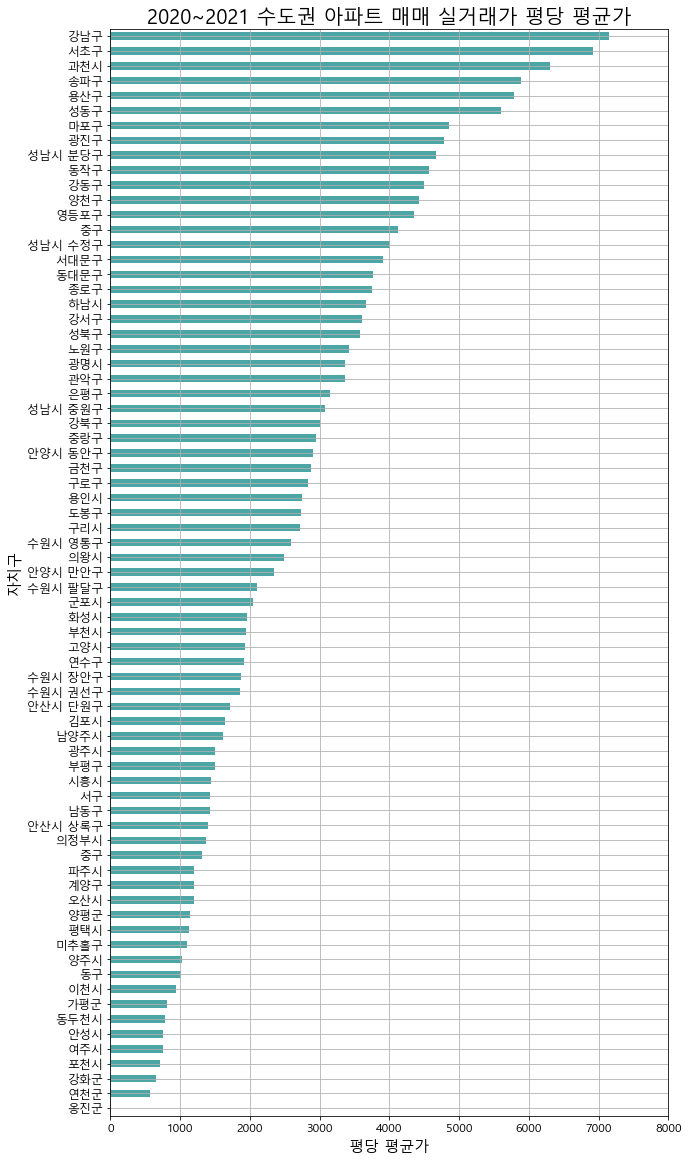

In [48]:
RealProperty['아파트 매매 평당거래가격'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, figsize=(10, 20), color="teal", alpha=0.7, fontsize=12)

plt.xlim(0, 8000)
plt.ylabel('자치구', fontsize=15)
plt.xlabel('평당 평균가', fontsize=15)
plt.title('2020~2021 수도권 아파트 매매 실거래가 평당 평균가', fontsize=20)
plt.show()

#### 서울 매매 단일 차트 / 서울 전세 단일 차트

In [49]:
# 서울 슬라이싱
SeoulAvg = RealProperty.loc[['강남구', '강동구', '강북구', '강서구', '관악구',
              '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구',
              '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']]  

SeoulAvg.head()

,아파트 매매 평당거래가격,아파트 전세 평당거래가격,오피스텔 매매 평당거래가격,오피스텔 전세 평당거래가격,연립다세대 매매 평당거래가격,연립다세대 전세 평당거래가격,단독/다가구 매매 평당거래가격,단독/다가구 전세 평당거래가격,상업업무용 부동산 매매 평당거래가격
법정동명,,,,,,,,,
강남구,7141.99,3327.30,3212.01,2973.52,4009.50,2729.24,4712.68,1525.04,5457.41
강동구,4496.72,2250.17,2390.96,2398.86,2501.19,2277.53,2084.80,1103.99,3369.64
강북구,3000.74,1731.34,1865.91,1600.63,1579.31,1331.41,1732.69,849.57,1889.72
강서구,3606.76,1882.43,2475.56,2404.04,1951.13,2046.15,2049.64,897.98,2544.35
관악구,3360.84,1990.09,2309.09,2606.92,1978.68,2120.49,1987.89,1489.18,2147.45


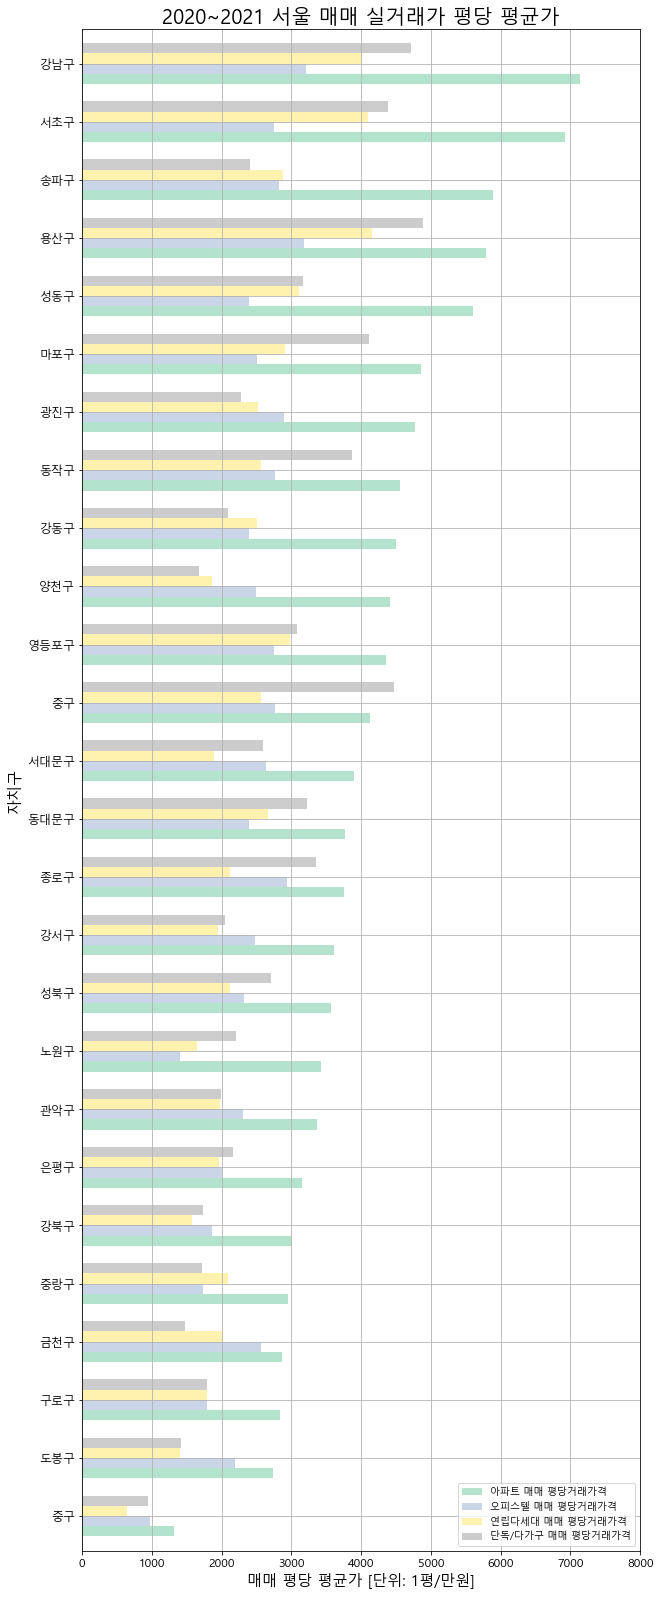

In [50]:
# 서울 매매 단일 차트
# 막대로 사용할 데이터 열만 가지는 데이터 프레임 생성
SeoulTrade_Sum = SeoulAvg.loc[:, ['아파트 매매 평당거래가격', '오피스텔 매매 평당거래가격',
                                  '연립다세대 매매 평당거래가격', '단독/다가구 매매 평당거래가격']]

# 차트의 Y 축 레이블 순서를 정렬하기 위하여 '아파트 매매 평당거래가격'열을 기준으로 정렬
SeoulTrade_Sum = SeoulTrade_Sum.sort_values(by="아파트 매매 평당거래가격", ascending=True)

# 차트 시각화
SeoulTrade_Sum.plot(kind='barh', grid=True, figsize=(10, 28), fontsize=12, cmap='Pastel2', width=0.7)

plt.xlim(0, 8000)
plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
plt.ylabel('자치구', fontsize=15)
plt.xlabel('매매 평당 평균가 [단위: 1평/만원]', fontsize=15)
plt.title('2020~2021 서울 매매 실거래가 평당 평균가', fontsize=20)
plt.show()

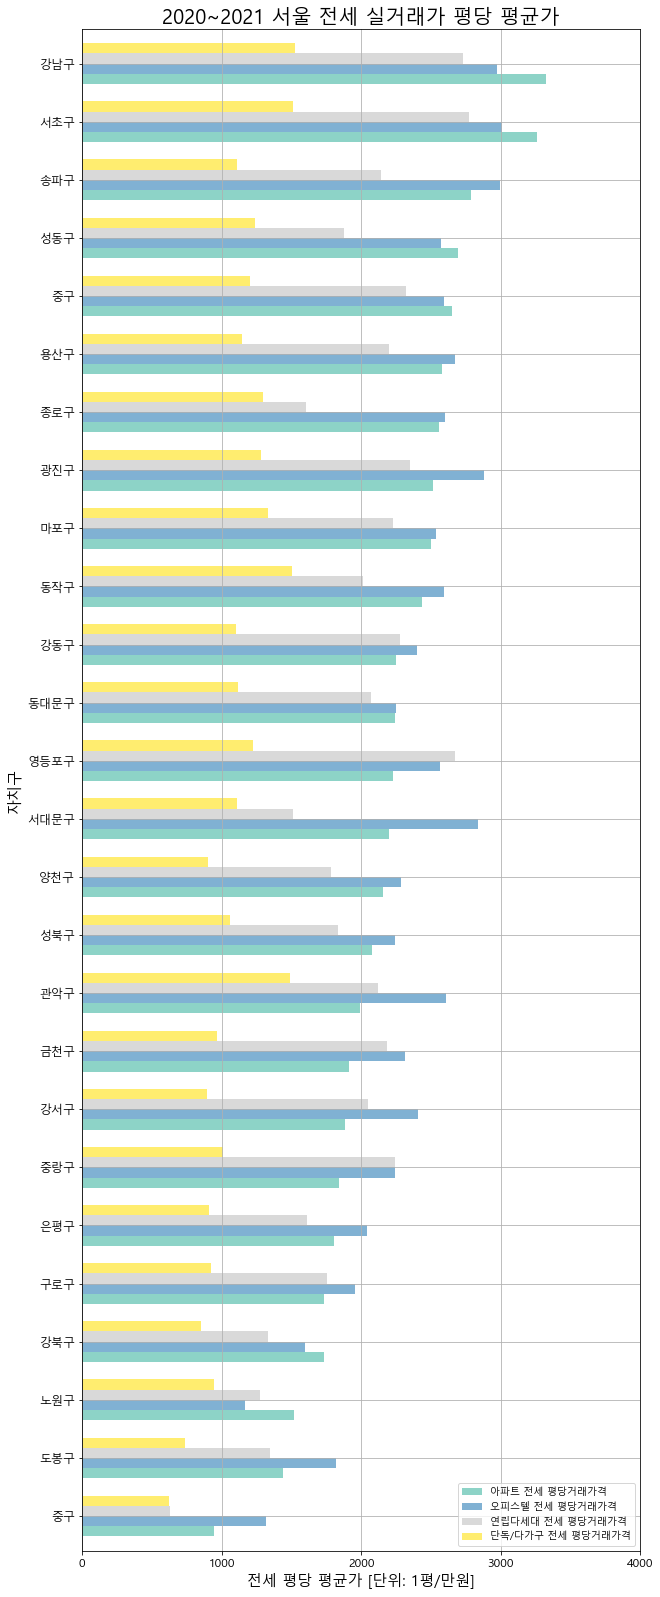

In [51]:
# 서울 전세 단일 차트
# 막대로 사용할 데이터 열만 가지는 데이터 프레임 생성
SeoulRent_Sum = SeoulAvg.loc[:, ['아파트 전세 평당거래가격', '오피스텔 전세 평당거래가격',
                                 '연립다세대 전세 평당거래가격', '단독/다가구 전세 평당거래가격']]

# 차트의 Y 축 레이블 순서를 정렬하기 위하여 '아파트 전세 평당거래가격'열을 기준으로 정렬
SeoulRent_Sum = SeoulRent_Sum.sort_values(by="아파트 전세 평당거래가격", ascending=True)

# 차트 시각화
SeoulRent_Sum.plot(kind='barh', grid=True, figsize=(10, 28), fontsize=12, cmap='Set3', width=0.7)

plt.xlim(0, 4000)
plt.xticks([0, 1000, 2000, 3000, 4000])
plt.ylabel('자치구', fontsize=15)
plt.xlabel('전세 평당 평균가 [단위: 1평/만원]', fontsize=15)
plt.title('2020~2021 서울 전세 실거래가 평당 평균가', fontsize=20)
plt.show()

#### 인천,경기 매매 단일 차트 / 인천,경기 전세 단일 차트

In [52]:
# 인천,경기 슬라이싱
InKiAvg = RealProperty.loc[['계양구', '남동구', '동구', '미추홀구', '부평구', '서구', '연수구', '중구', '강화군',
              '옹진군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시',
              '성남시 수정구', '성남시 중원구', '성남시 분당구', '수원시 장안구', '수원시 권선구', '수원시 팔달구', '수원시 영통구',
              '시흥시', '안산시 상록구', '안산시 단원구', '안성시', '안양시 만안구', '안양시 동안구', '양주시', '오산시', '용인시',
              '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시', '여주시', '가평군', '양평군' ,'연천군']]  

InKiAvg.head()

,아파트 매매 평당거래가격,아파트 전세 평당거래가격,오피스텔 매매 평당거래가격,오피스텔 전세 평당거래가격,연립다세대 매매 평당거래가격,연립다세대 전세 평당거래가격,단독/다가구 매매 평당거래가격,단독/다가구 전세 평당거래가격,상업업무용 부동산 매매 평당거래가격
법정동명,,,,,,,,,
계양구,1192.30,965.26,880.49,906.23,766.34,798.68,1049.55,463.89,1122.04
남동구,1422.04,1116.19,955.79,1027.72,801.66,689.91,934.45,511.82,1726.37
동구,1016.75,789.93,1270.64,1119.15,837.14,421.04,1125.34,330.72,1123.60
미추홀구,1093.17,951.33,981.12,865.63,801.22,679.44,1061.88,515.42,1393.46
부평구,1496.96,1192.38,1082.81,1088.54,1027.20,795.25,1518.95,472.41,1781.57


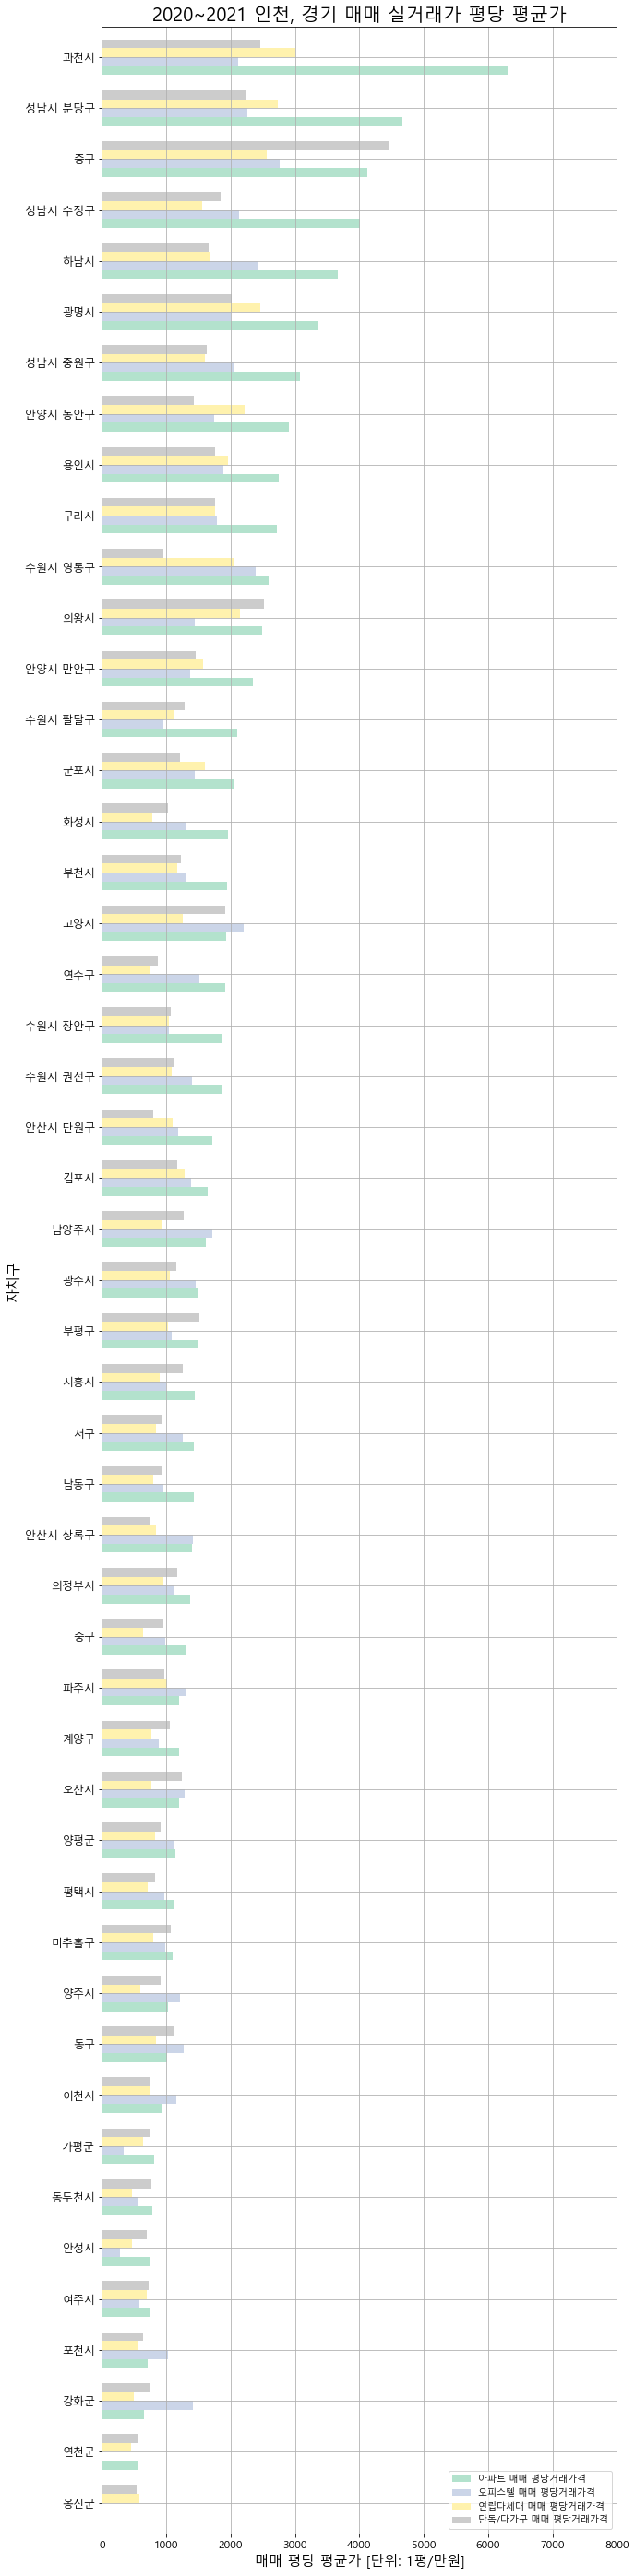

In [53]:
# 인천, 경기 매매 단일 차트
# 막대로 사용할 데이터 열만 가지는 데이터 프레임 생성
InKiTrade_Sum = InKiAvg.loc[:, ['아파트 매매 평당거래가격', '오피스텔 매매 평당거래가격',
                                  '연립다세대 매매 평당거래가격', '단독/다가구 매매 평당거래가격']]

# 차트의 Y 축 레이블 순서를 정렬하기 위하여 '아파트 매매 평당거래가격'열을 기준으로 정렬
InKiTrade_Sum = InKiTrade_Sum.sort_values(by="아파트 매매 평당거래가격", ascending=True)

# 차트 시각화
InKiTrade_Sum.plot(kind='barh', grid=True, figsize=(10, 50), fontsize=12, cmap='Pastel2', width=0.7)

plt.xlim(0, 8000)
plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
plt.ylabel('자치구', fontsize=15)
plt.xlabel('매매 평당 평균가 [단위: 1평/만원]', fontsize=15)
plt.title('2020~2021 인천, 경기 매매 실거래가 평당 평균가', fontsize=20)
plt.show()

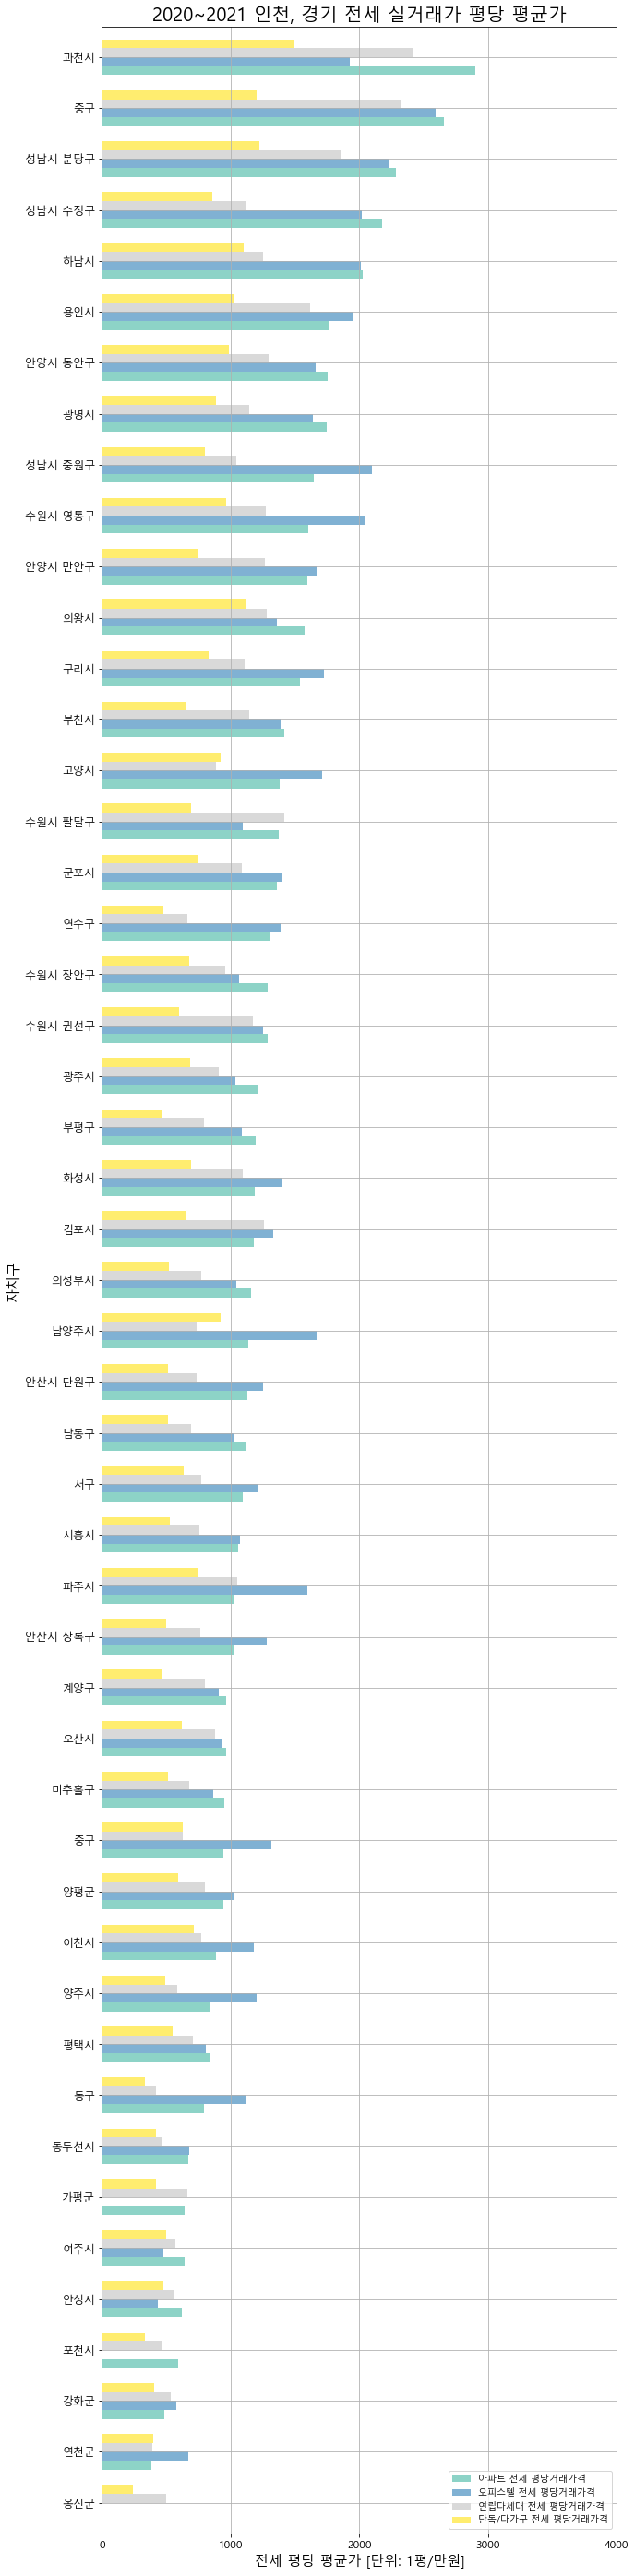

In [54]:
# 인천, 경기 전세 단일 차트
# 막대로 사용할 데이터 열만 가지는 데이터 프레임 생성
InKiRent_Sum = InKiAvg.loc[:, ['아파트 전세 평당거래가격', '오피스텔 전세 평당거래가격',
                                 '연립다세대 전세 평당거래가격', '단독/다가구 전세 평당거래가격']]

# 차트의 Y 축 레이블 순서를 정렬하기 위하여 '아파트 전세 평당거래가격'열을 기준으로 정렬
InKiRent_Sum = InKiRent_Sum.sort_values(by="아파트 전세 평당거래가격", ascending=True)

# 차트 시각화
InKiRent_Sum.plot(kind='barh', grid=True, figsize=(10, 50), fontsize=12, cmap='Set3', width=0.7)

plt.xlim(0, 4000)
plt.xticks([0, 1000, 2000, 3000, 4000])
plt.ylabel('자치구', fontsize=15)
plt.xlabel('전세 평당 평균가 [단위: 1평/만원]', fontsize=15)
plt.title('2020~2021 인천, 경기 전세 실거래가 평당 평균가', fontsize=20)
plt.show()